In [2]:
import pandas as pd
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
print(bike_rentals['season'].unique())

[1 2 3 4]


In [4]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


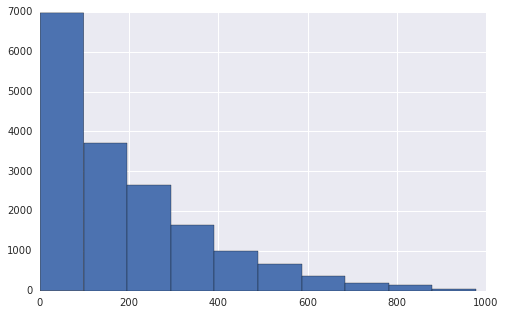

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(8,5))
plt.hist(bike_rentals["cnt"])
plt.show()

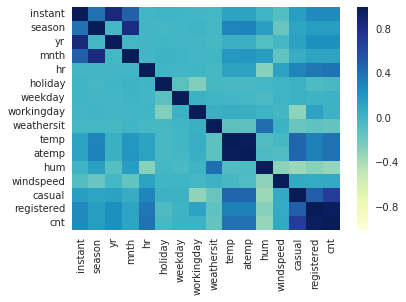

In [6]:
import numpy as np
corr= bike_rentals.corr()
corr
sns.heatmap(corr, cmap="YlGnBu")

In [7]:
corr_cnt = bike_rentals.corr()['cnt']
corr_cnt

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [8]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [14]:
import numpy as np
shuffled_index = np.random.permutation(bike_rentals.index)
bike_rentals = bike_rentals.iloc[shuffled_index]
highest_column = int(bike_rentals.shape[0]*0.8)
train = bike_rentals[0:highest_column]
test = bike_rentals[highest_column:]

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
features = bike_rentals.drop(['cnt','casual','dteday','registered','atemp'], axis=1)
feature_columns= [k for k in features.columns]
reg = LinearRegression()
reg.fit(train[feature_columns], train["cnt"])
predictions = reg.predict(test[feature_columns])
mse = np.mean((predictions - test["cnt"]) ** 2)
mse

17412.987097703182

In [23]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(min_samples_leaf=5)
reg.fit(train[feature_columns], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [24]:
predictions = reg.predict(test[feature_columns])
numpy.mean((predictions - test["cnt"]) ** 2)

2532.331972391

In [25]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[feature_columns], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [27]:
predictions = reg.predict(test[feature_columns])
np.mean((predictions - test["cnt"]) ** 2)

1995.337760528803